In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns

In [3]:
df=pd.read_csv("netflix_users.csv")

In [4]:
df

,User_ID,Name,Age,Country,Subscription_Type,Watch_Time_Hours,Favorite_Genre,Last_Login
0,1,James Martinez,18,France,Premium,80.26,Drama,2024-05-12
1,2,John Miller,23,USA,Premium,321.75,Sci-Fi,2025-02-05
2,3,Emma Davis,60,UK,Basic,35.89,Comedy,2025-01-24
3,4,Emma Miller,44,USA,Premium,261.56,Documentary,2024-03-25
4,5,Jane Smith,68,USA,Standard,909.30,Drama,2025-01-14
...,...,...,...,...,...,...,...,...
24995,24996,David Miller,18,Australia,Premium,183.88,Horror,2025-01-18
24996,24997,Jane Miller,17,USA,Premium,112.37,Drama,2024-06-29
24997,24998,Sarah Miller,14,USA,Premium,351.80,Action,2024-10-16
24998,24999,Michael Williams,71,USA,Basic,655.89,Action,2024-08-27


In [5]:
df.shape

(25000, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   User_ID            25000 non-null  int64  
 1   Name               25000 non-null  object 
 2   Age                25000 non-null  int64  
 3   Country            25000 non-null  object 
 4   Subscription_Type  25000 non-null  object 
 5   Watch_Time_Hours   25000 non-null  float64
 6   Favorite_Genre     25000 non-null  object 
 7   Last_Login         25000 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 1.5+ MB


In [7]:
df.columns

Index(['User_ID', 'Name', 'Age', 'Country', 'Subscription_Type',
       'Watch_Time_Hours', 'Favorite_Genre', 'Last_Login'],
      dtype='object')

In [8]:
df.describe()

,User_ID,Age,Watch_Time_Hours
count,25000.000000,25000.000000,25000.000000
mean,12500.500000,46.482880,500.468858
std,7217.022701,19.594861,286.381815
min,1.000000,13.000000,0.120000
25%,6250.750000,29.000000,256.567500
50%,12500.500000,46.000000,501.505000
75%,18750.250000,63.000000,745.732500
max,25000.000000,80.000000,999.990000


In [9]:
df.nunique()

User_ID              25000
Name                   100
Age                     68
Country                 10
Subscription_Type        3
Watch_Time_Hours     22087
Favorite_Genre           7
Last_Login             366
dtype: int64

In [10]:
df.User_ID.nunique()

25000

**Preprocessing check for duplicate value**

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
Avd_age=df.Age.mean()

In [13]:
Avd_age

np.float64(46.48288)

**Some othersteps to prepare dataset for modeling**

## Exploratory Data Analysis ##

In [14]:
sns.set(rc={'axes.facecolor':'white',
            'axes.grid':False,
           'axes.labelsize':14,
            'axes.labelcolor':'black',
            'axes.titlesize':16,
            'axes.titlecolor':'black',
           'xtick.labelsize':12,
           'xtick.color':'black',
           'ytick.labelsize':12,
           'ytick.color':'black',
           'figure.facecolor':'white'})

<Axes: xlabel='Country', ylabel='count'>

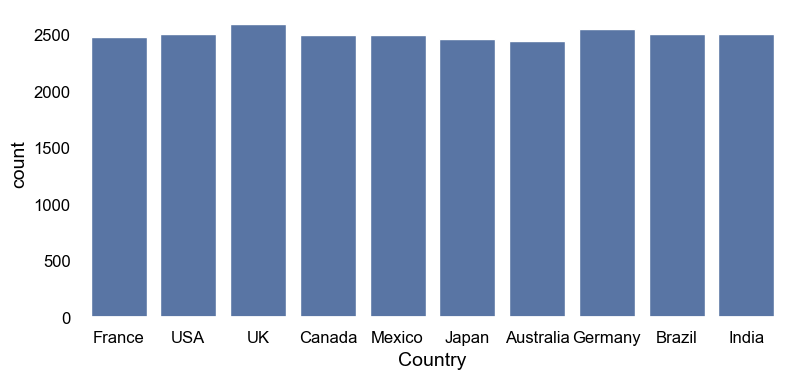

In [15]:
# To compare country and subscrption 
plot.figure(figsize=(9,4),dpi=100)
sns.countplot(x='Country',data=df)

In [16]:
Watch_time=df.Watch_Time_Hours.value_counts()
Watch_time

Watch_Time_Hours
715.37    5
995.15    5
544.38    4
50.42     4
970.68    4
         ..
265.40    1
460.60    1
511.72    1
620.74    1
25.80     1
Name: count, Length: 22087, dtype: int64

<Axes: xlabel='Subscription_Type', ylabel='count'>

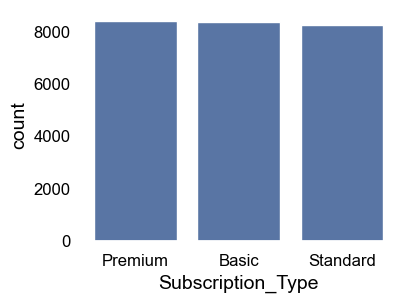

In [17]:
plot.figure(figsize=(4,3),dpi=100)
sns.countplot(x='Subscription_Type',data=df)

In [18]:
Favorite=len(df[(df.Favorite_Genre=='Permiun')&(df.	Age==18)])
Favorite

0

<Axes: xlabel='Subscription_Type', ylabel='count'>

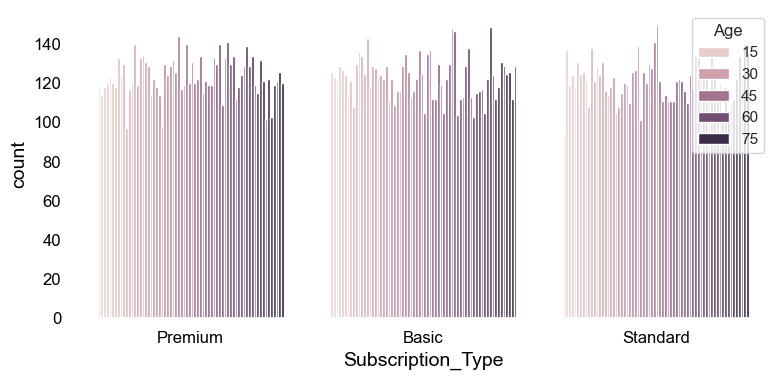

In [19]:
plot.figure(figsize=(9,4),dpi=100)
sns.countplot(x='Subscription_Type',hue='Age',data=df)

In [20]:
subscription=df[df.Subscription_Type=='Premium']['Age']
subscription=sum(subscription)/len(subscription)*100

sub_basic=df[df.Subscription_Type=='Basic']['Age']
sub_basic=sum(sub_basic)/len(sub_basic)*100

print("percentage of subsription premium",subscription)
print("percentage of subsription basic",sub_basic)


percentage of subsription premium 4655.796238990717
percentage of subsription basic 4634.968884633796


In [21]:
df.groupby('Subscription_Type')['Age'].value_counts(normalize=True)

Subscription_Type  Age
Basic              71     0.017831
                   57     0.017712
                   58     0.017592
                   26     0.017113
                   63     0.016515
                            ...   
Standard           32     0.012740
                   71     0.012497
                   41     0.012254
                   73     0.012254
                   13     0.011526
Name: proportion, Length: 204, dtype: float64

In [22]:
rate=df.groupby('Subscription_Type')['Age'].value_counts(normalize=True)
print("percentage of subscription premium:",rate[18]*100)
print("percentage of subscription basic:",rate[25]*100)
print("percentage of subscription standard:",rate[68]*100)


percentage of subscription premium: 1.543800861656295
percentage of subscription basic: 1.5078985160363811
percentage of subscription standard: 1.713877648179005


C:\Users\divya\AppData\Local\Temp\ipykernel_13840\2967475209.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("percentage of subscription premium:",rate[18]*100)
C:\Users\divya\AppData\Local\Temp\ipykernel_13840\2967475209.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("percentage of subscription basic:",rate[25]*100)
C:\Users\divya\AppData\Local\Temp\ipykernel_13840\2967475209.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `

<Axes: xlabel='Favorite_Genre', ylabel='count'>

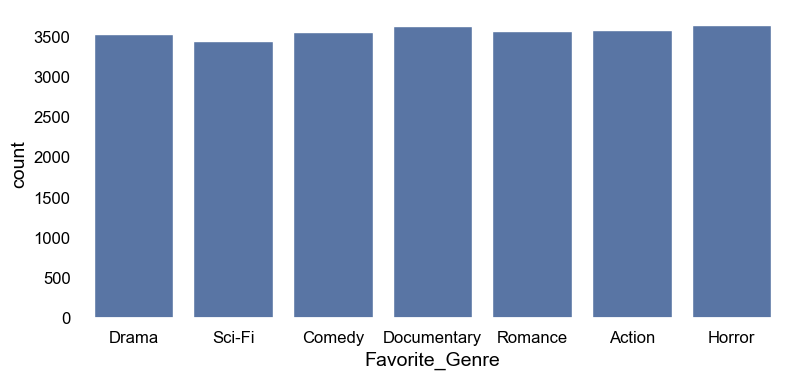

In [23]:
plot.figure(figsize=(9,4),dpi=100)
sns.countplot(x='Favorite_Genre',data=df)

<Axes: xlabel='Country', ylabel='count'>

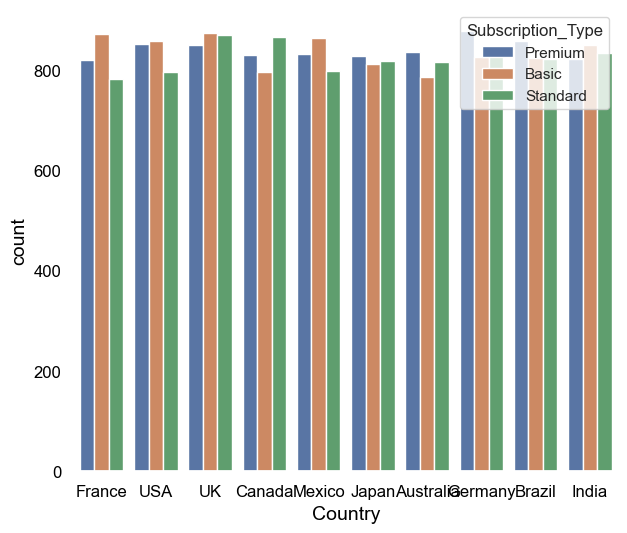

In [24]:
plot.figure(figsize=(7,6),dpi=100)
sns.countplot(x='Country',hue='Subscription_Type',data=df)

In [25]:
df.groupby('Favorite_Genre')['Subscription_Type'].value_counts(normalize=True)

Favorite_Genre  Subscription_Type
Action          Basic                0.338534
                Standard             0.336584
                Premium              0.324882
Comedy          Basic                0.334737
                Premium              0.332772
                Standard             0.332491
Documentary     Standard             0.335534
                Basic                0.332233
                Premium              0.332233
Drama           Premium              0.339938
                Basic                0.335692
                Standard             0.324370
Horror          Premium              0.346743
                Basic                0.331418
                Standard             0.321839
Romance         Basic                0.349944
                Standard             0.326428
                Premium              0.323628
Sci-Fi          Premium              0.352822
                Standard             0.330535
                Basic                0.316643


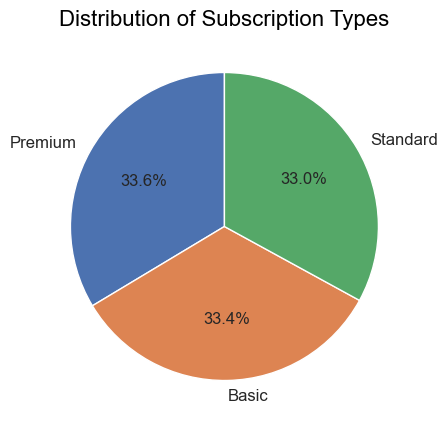

In [26]:

sub_counts = df['Subscription_Type'].value_counts()

plot.figure(figsize=(5,5))
plot.pie(sub_counts, labels=sub_counts.index, autopct='%1.1f%%', startangle=90)
plot.title("Distribution of Subscription Types")
plot.show()

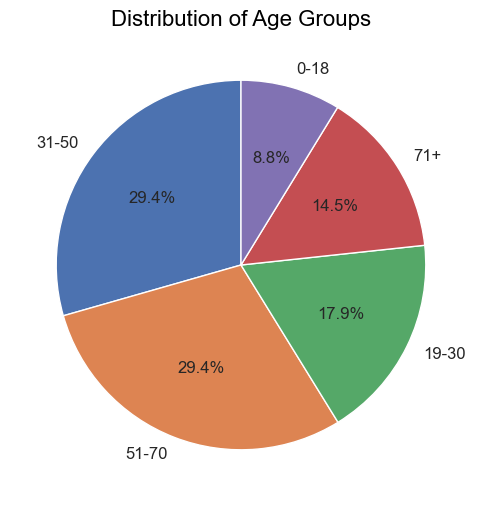

In [27]:
age_bins = [0, 18, 30, 50, 70, 100]
age_labels = ['0-18','19-30','31-50','51-70','71+']
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)
age_counts = df['Age_Group'].value_counts()
plot.figure(figsize=(6,6))
plot.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', startangle=90)
plot.title("Distribution of Age Groups")
plot.show()

C:\Users\divya\AppData\Local\Temp\ipykernel_13840\1794290409.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Watch_Time_Hours,hist=False)


<Axes: xlabel='Watch_Time_Hours', ylabel='Density'>

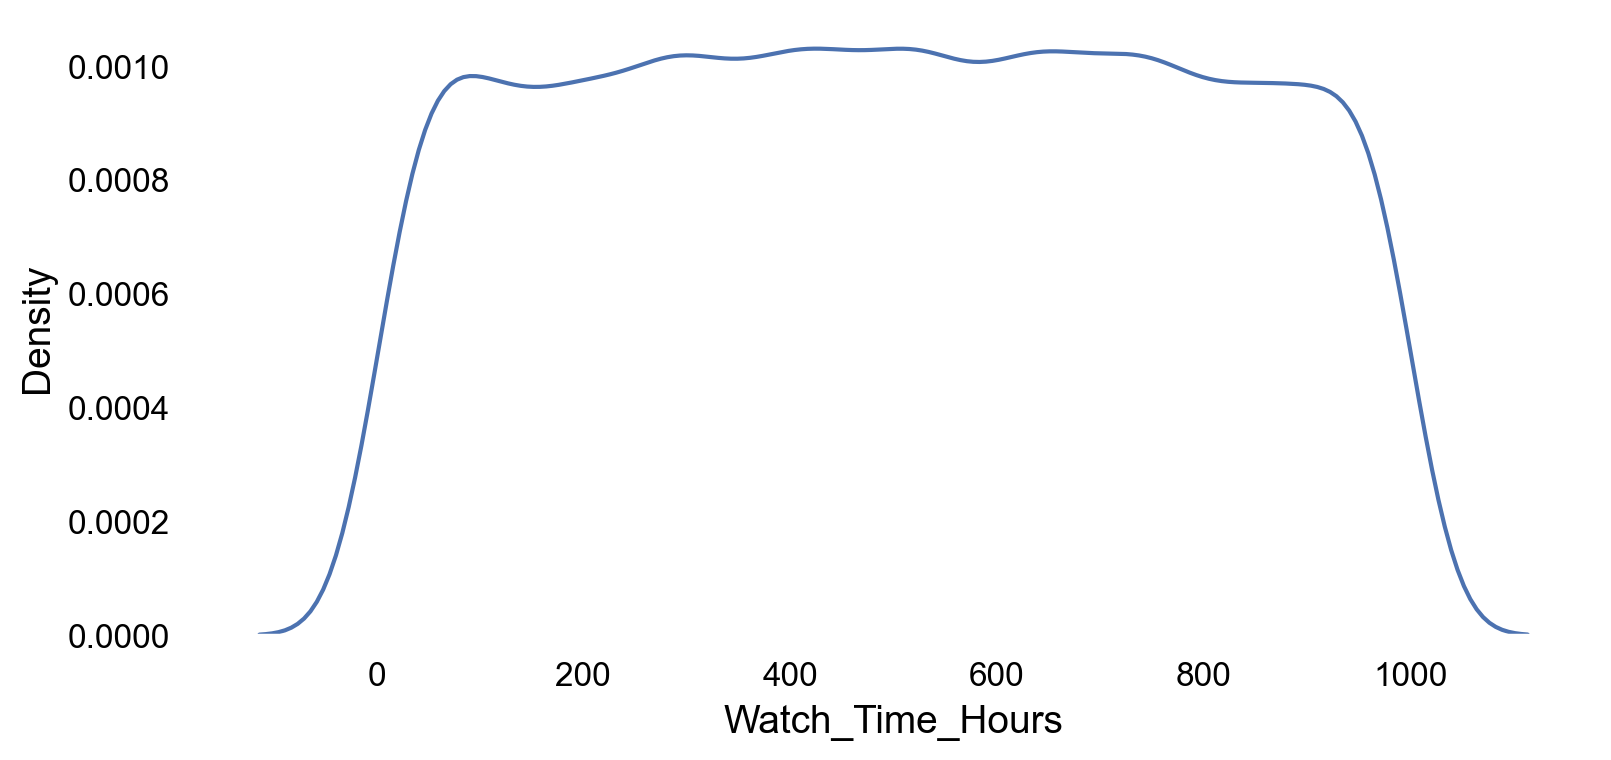

In [28]:
plot.figure(figsize=(9,4),dpi=200)
sns.distplot(df.Watch_Time_Hours,hist=False)

<Axes: ylabel='Favorite_Genre'>

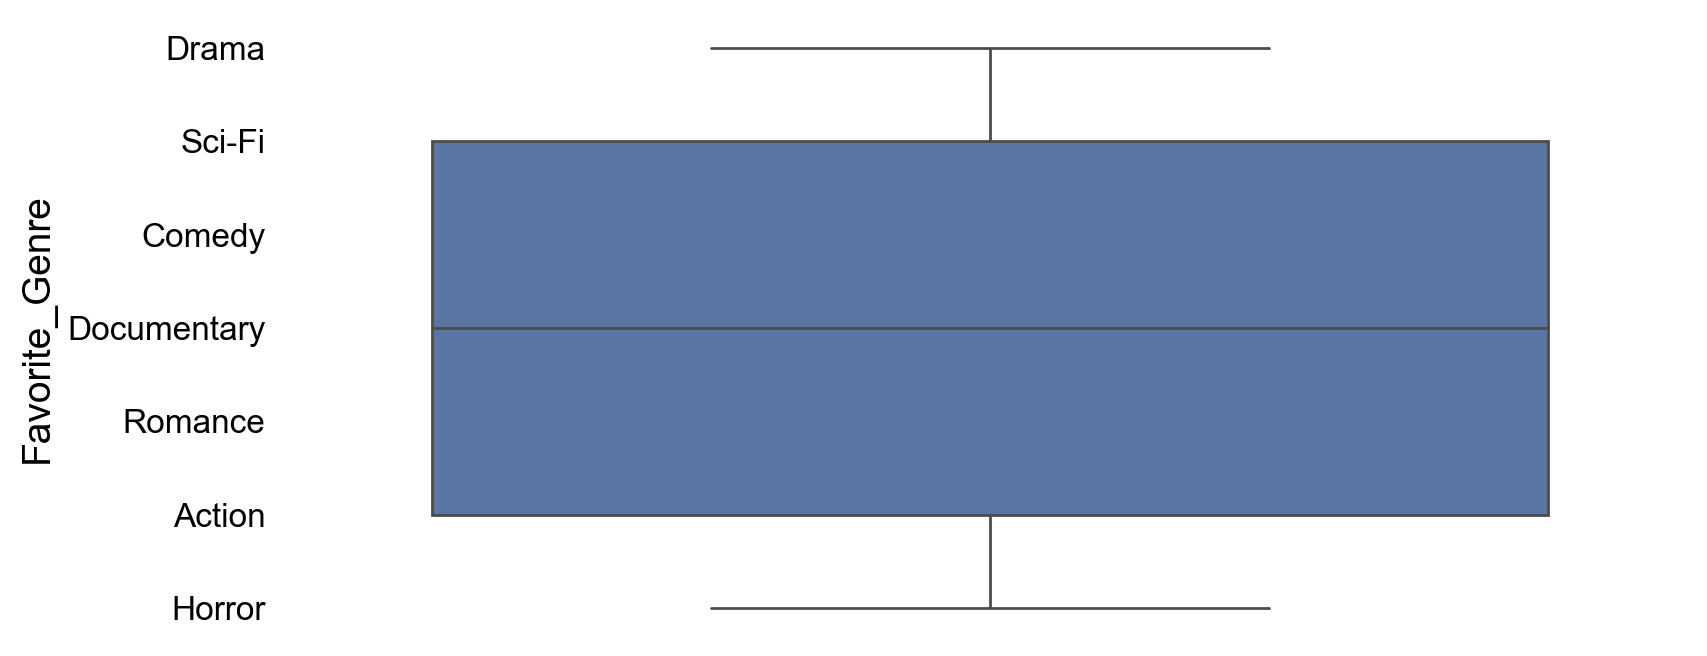

In [29]:
plot.figure(figsize=(9,4),dpi=200)
sns.boxplot(y='Favorite_Genre',data=df)

<Axes: xlabel='Country', ylabel='Age'>

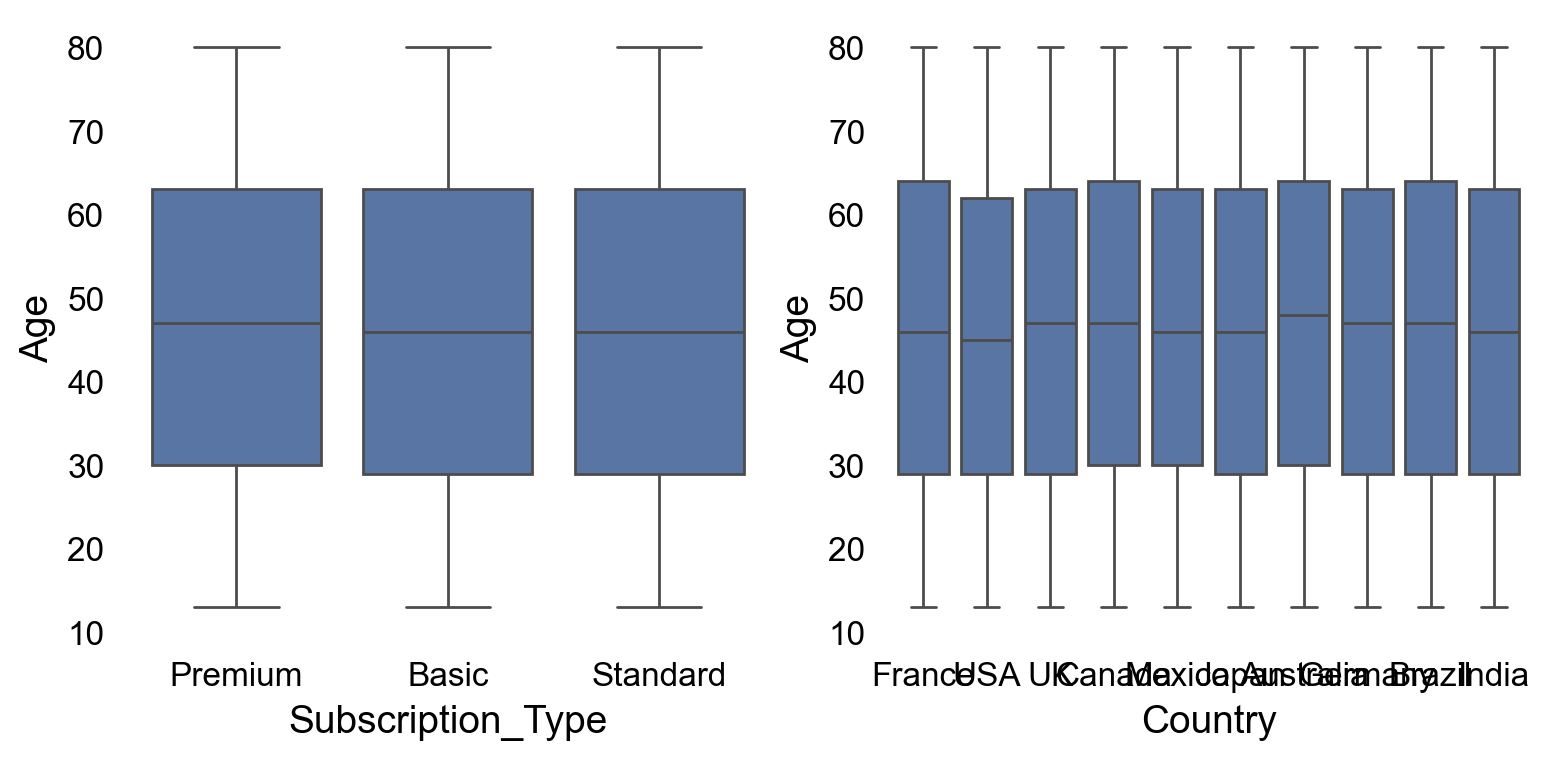

In [30]:
fig = plot.figure(figsize = (9,4), dpi = 200)
p1 = fig.add_subplot(1,2,1)
sns.boxplot(x = 'Subscription_Type',y = 'Age', data = df)
p2 = fig.add_subplot(1,2,2)
sns.boxplot(x = 'Country',y = 'Age', data =df)

<Axes: xlabel='Subscription_Type', ylabel='count'>

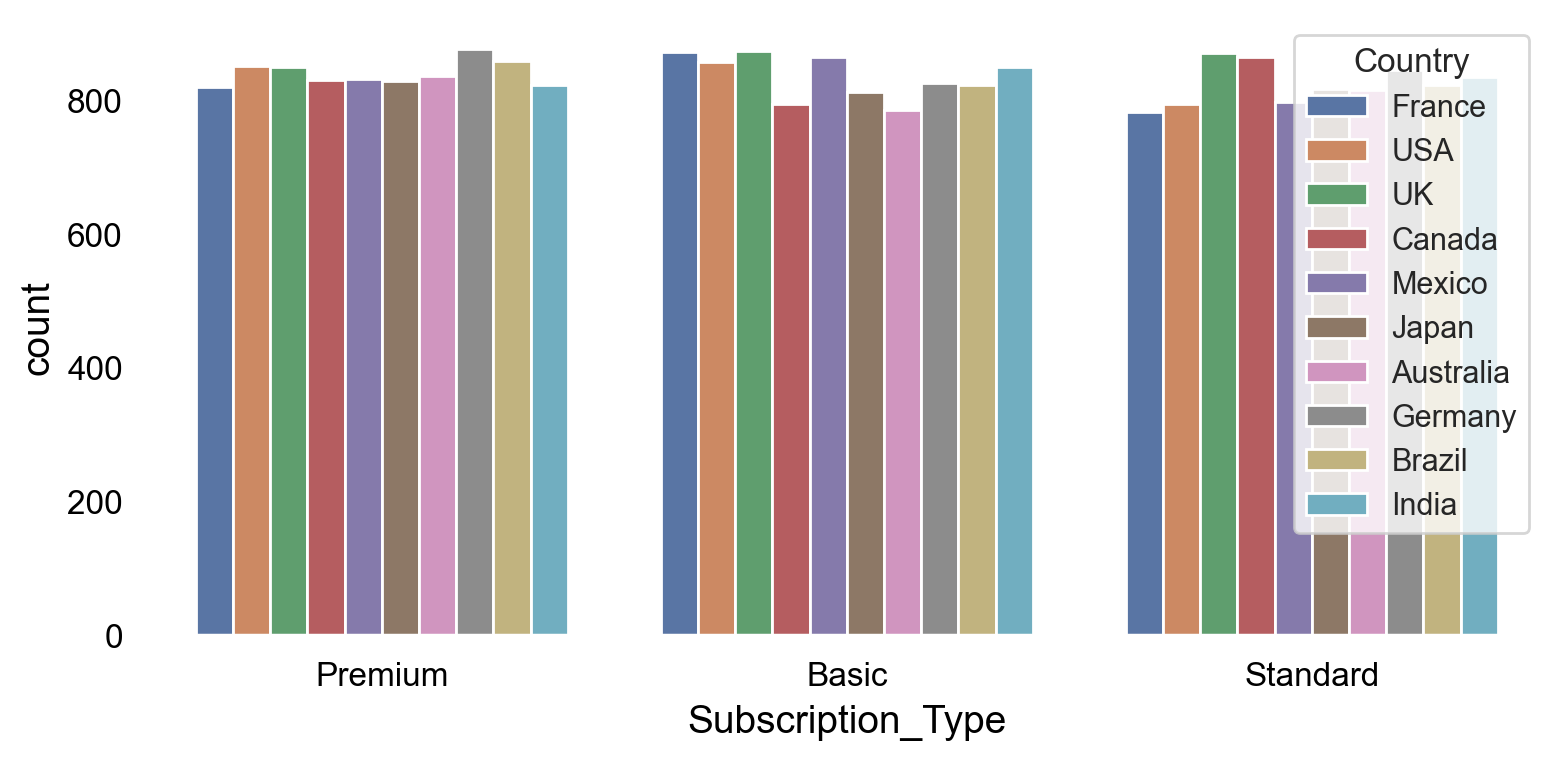

In [31]:
plot.figure(figsize = (9,4), dpi = 200)
sns.countplot(x='Subscription_Type', hue = 'Country', data =df)